In this project, I am interested in how does winning an award affect the player's salary? Originally, I was interested in how does performance affect players' salary, but since I don't know much about baseball, I would like to use the list of awarded players as a list of players with "good performance". 

# Exploring data and play with it

In [1]:
import pandas as pd
import seaborn as sns

Import the master csv file.

In [2]:
master = pd.read_csv('master.csv', index_col='playerID')

In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18846 entries, aardsda01 to zychto01
Data columns (total 23 columns):
birthYear       18703 non-null float64
birthMonth      18531 non-null float64
birthDay        18382 non-null float64
birthCountry    18773 non-null object
birthState      18220 non-null object
birthCity       18647 non-null object
deathYear       9336 non-null float64
deathMonth      9335 non-null float64
deathDay        9334 non-null float64
deathCountry    9329 non-null object
deathState      9277 non-null object
deathCity       9325 non-null object
nameFirst       18807 non-null object
nameLast        18846 non-null object
nameGiven       18807 non-null object
weight          17975 non-null float64
height          18041 non-null float64
bats            17655 non-null object
throws          17868 non-null object
debut           18653 non-null object
finalGame       18653 non-null object
retroID         18792 non-null object
bbrefID         18845 non-null object
dtypes: f

In [4]:
print master.head()

           birthYear  birthMonth  birthDay birthCountry birthState  \
playerID                                                             
aardsda01     1981.0        12.0      27.0          USA         CO   
aaronha01     1934.0         2.0       5.0          USA         AL   
aaronto01     1939.0         8.0       5.0          USA         AL   
aasedo01      1954.0         9.0       8.0          USA         CA   
abadan01      1972.0         8.0      25.0          USA         FL   

            birthCity  deathYear  deathMonth  deathDay deathCountry  \
playerID                                                              
aardsda01      Denver        NaN         NaN       NaN          NaN   
aaronha01      Mobile        NaN         NaN       NaN          NaN   
aaronto01      Mobile     1984.0         8.0      16.0          USA   
aasedo01       Orange        NaN         NaN       NaN          NaN   
abadan01   Palm Beach        NaN         NaN       NaN          NaN   

           

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import the csv file containing salary information.

In [6]:
salaries = pd.read_csv('Salaries.csv')

In [7]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


Display the scatter graph of the salary table, with the x-coordinate indicating years from 1985 to 2015, and the y-coordinate indicating salary from 0 to 33 million.

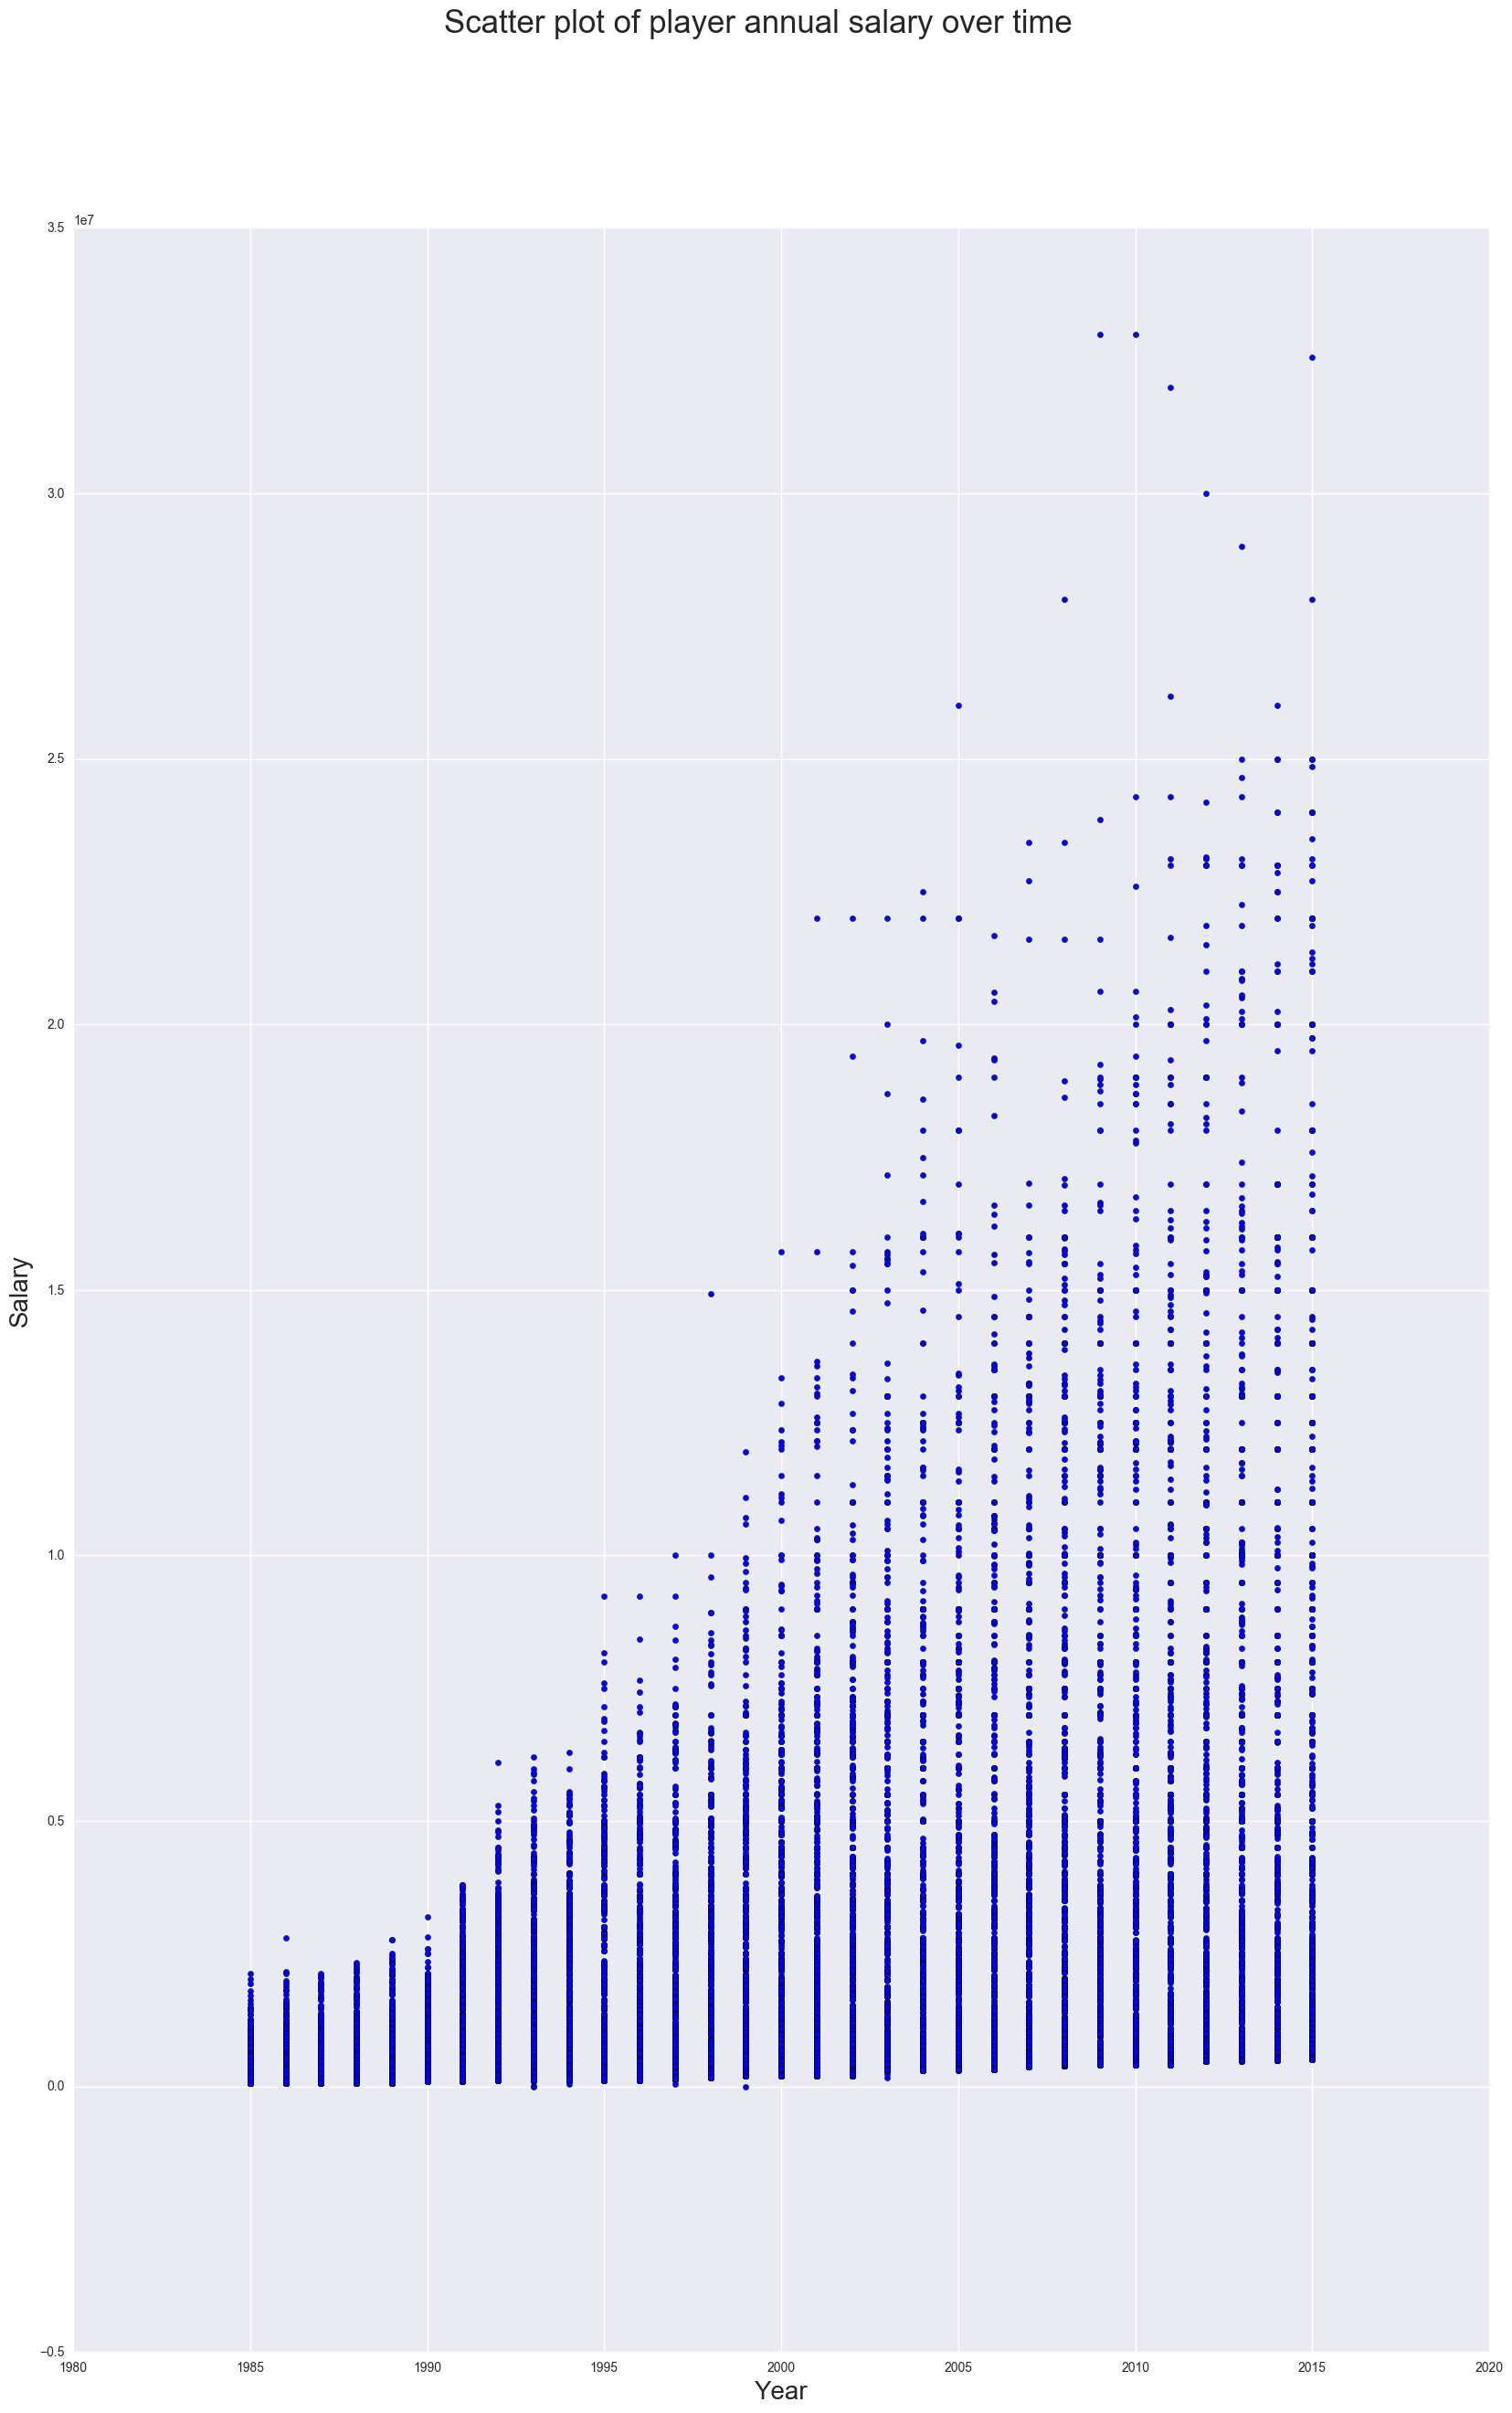

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
plt.scatter(salaries["yearID"],salaries['salary'])
fig.suptitle("Scatter plot of player annual salary over time",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Salary",fontsize=20)

## Observation from Scatter plot of player annual salary over time
From the scatter plot above, we can see that from 1985 to 2015, the lowest salary has increased a little, while the highest salary has increased from about 2 million in 1985 to 32 million in 2015. The highest salary shown in the scatter plot were about 33 million, in 2009 and 2010. Also, from the scatter plot, we can notice that salaries of players have become more and more spread from 1985 to 2015, however more players were making lower salaries in 1985 as well as in 2015.

Find the average salary for every year from 1985 to 2015.

In [9]:
mean_salaries_by_year=salaries.groupby(["yearID"],as_index=False).mean()

Plot the average salary for every year.

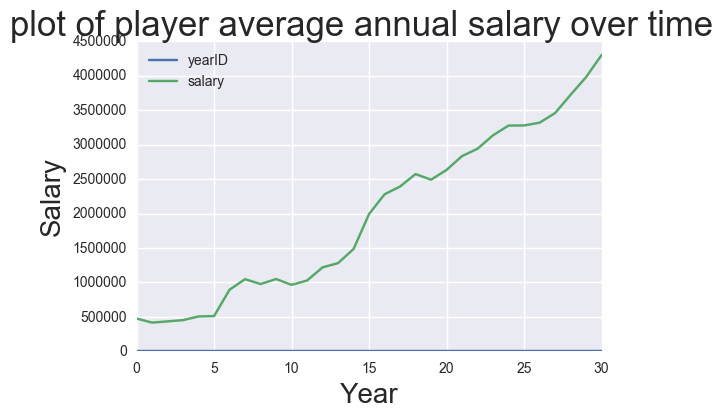

In [10]:
mean_salaries_by_year.plot()
plt.suptitle("plot of player average annual salary over time",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Salary",fontsize=20)

From the above plot, we can clearly see that the average annual salary is steadily on the rise.

In [11]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


Find the average salary for each year by each team

In [12]:
data_by_year_team=salaries.groupby(["yearID","teamID"],as_index=False).mean()

Store the average salary for each team in each year into a default dictionary for future use.

Save the list of players whose salary information is stored to a default dictionary.

In [13]:
players_with_salary=salaries[["playerID","yearID","salary"]]
print len(players_with_salary)

25575


In [14]:
print players_with_salary.iloc[0]

playerID    barkele01
yearID           1985
salary         870000
Name: 0, dtype: object


In [15]:
#Remove players that do not exist in master
players_with_salary=players_with_salary[players_with_salary["playerID"].isin(master.index.values)]

Save the list of players whose salary is over 1 million (>= 1 year) and over 10 million to different two sets. Also find the player whose salary was highest (max_salary, max_player)

In [16]:
max_salary=players_with_salary.groupby(["playerID"])['salary'].max().max()

In [17]:
max_player=players_with_salary[players_with_salary['salary']==max_salary]["playerID"]

In [18]:
max_player=max_player.iloc[0]

In [19]:
print max_player

rodrial01


In [20]:
players_with_salary[players_with_salary['playerID']==max_player]

,playerID,yearID,salary
7286,rodrial01,1994,442333
8250,rodrial01,1995,442333
9191,rodrial01,1996,442334
10111,rodrial01,1997,1062500
11089,rodrial01,1998,2162500
12091,rodrial01,1999,3112500
12959,rodrial01,2000,4362500
13923,rodrial01,2001,22000000
14766,rodrial01,2002,22000000
15595,rodrial01,2003,22000000


In [21]:
players_over_1_million_salary=players_with_salary[players_with_salary['salary']>=1000000]
players_over_10_million_salary=players_with_salary[players_with_salary['salary']>=10000000]

players_over_1_million_salary=players_over_1_million_salary['playerID']
players_over_10_million_salary=players_over_10_million_salary['playerID']

In [22]:
players_over_10_million_salary.drop_duplicates(inplace=True)
players_over_1_million_salary.drop_duplicates(inplace=True)

/Users/dan/anaconda2/lib/python2.7/site-packages/pandas/core/base.py:1141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


In [23]:
print len(players_over_1_million_salary)

1962


In [24]:
average_salary_over_1_million=players_with_salary[players_with_salary['playerID'].isin(players_over_1_million_salary)].groupby(["playerID"])['salary'].mean()

In [25]:
grouped_salary_player=players_with_salary.groupby(["playerID"])        

In [26]:
mean_salary=grouped_salary_player['salary'].mean()

In [27]:
mean_salary=mean_salary.to_frame()

In [28]:
sorted_average_salary=mean_salary.sort(["salary"])

/Users/dan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Print average salary of players, sorted in the ascending order of salary.

In [29]:
print sorted_average_salary

             salary
playerID           
mullifr01     60000
mizerjo01     60000
tillmru01     60000
soffra01      60000
martimi01     60000
tomlida01     60000
clibust02     60000
speckcl01     60000
loyndmi01     60000
willire01     60000
romanjo02     60000
moonebi01     60000
johnsjo04     60000
hartmi02      62500
peterst01     62500
pawlojo01     62500
cecenjo01     62500
fieldbr01     62500
brennwi01     62500
arnolto01     62500
sierrca01     62500
dimicfr01     62500
aldrija01     62500
capelmi01     62500
epparji01     62500
rittere01     62500
eavega01      62500
medvisc01     62500
ellswst01     62500
gideobr01     62500
...             ...
fukudko01   9700000
delgaca01   9753266
crawfca02   9926417
hunteto01  10091470
greinza01  10227545
zitoba01   10541153
canoro01   10587180
hallaro01  10642261
santajo01  10803523
suzukic01  10808765
ramirma02  10885672
hernafe02  11197114
beltrca01  11222516
soriaal01  11425714
hamelco01  11433333
verlaju01  11471500
zambrca01  11495000


From the print above, we can see that there is a huge difference among average annual salaries for players. The highest average salary can be 22 million while the the lowest average salary is just 60000.

In [30]:
print grouped_salary_player.get_group("tanakma01")

        playerID  yearID    salary
24428  tanakma01    2014  22000000
25245  tanakma01    2015  22000000


We can notice that the playerID tanakma01 who has highest average salary has only 2 annual salary in the salaries dataset. Let's look at the salary information of the player with 2nd highest average annual salary.

In [31]:
print grouped_salary_player.get_group("rodrial01")

        playerID  yearID    salary
7286   rodrial01    1994    442333
8250   rodrial01    1995    442333
9191   rodrial01    1996    442334
10111  rodrial01    1997   1062500
11089  rodrial01    1998   2162500
12091  rodrial01    1999   3112500
12959  rodrial01    2000   4362500
13923  rodrial01    2001  22000000
14766  rodrial01    2002  22000000
15595  rodrial01    2003  22000000
16154  rodrial01    2004  22000000
16949  rodrial01    2005  26000000
17774  rodrial01    2006  21680727
18619  rodrial01    2007  22708525
19461  rodrial01    2008  28000000
20286  rodrial01    2009  33000000
21109  rodrial01    2010  33000000
21945  rodrial01    2011  32000000
22793  rodrial01    2012  30000000
23616  rodrial01    2013  29000000
25239  rodrial01    2015  22000000


Read the csv file of awards players.

In [32]:
awards_players=pd.read_csv( 'AwardsPlayers.csv', index_col='playerID')

In [33]:
print awards_players.index.values

['bondto01' 'hinespa01' 'heckegu01' ..., 'crawfbr01' 'donaljo02'
 'perezsa02']


In [34]:
awards_players.head()

,awardID,yearID,lgID,tie,notes
playerID,,,,,
bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
hinespa01,Triple Crown,1878,NL,NaN,NaN
heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
oneilti01,Triple Crown,1887,AA,NaN,NaN


In [35]:
awards_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6078 entries, bondto01 to perezsa02
Data columns (total 5 columns):
awardID    6078 non-null object
yearID     6078 non-null int64
lgID       6078 non-null object
tie        45 non-null object
notes      4648 non-null object
dtypes: int64(1), object(4)
memory usage: 284.9+ KB


In [36]:
awards_players["tie"].isnull().head()

playerID
bondto01     True
hinespa01    True
heckegu01    True
radboch01    True
oneilti01    True
Name: tie, dtype: bool

Save the players who were awarded and whose salary can be found in the salary table to a list.

In [37]:
awarded_players=pd.read_csv('AwardsPlayers.csv')
first_awarded_year=awarded_players[["playerID","yearID"]].groupby("playerID").min()
first_awarded_year["playerID"]=first_awarded_year.index
first_awarded_year=first_awarded_year.rename(columns={"playerID":"playerID","yearID":"first_awarded_year"})

In [38]:
awarded_players_with_salary=set(awarded_players["playerID"])&set(players_with_salary["playerID"])

In [39]:
print len(awarded_players)

6078


In [40]:
def is_awarded(x):
    return (x in awarded_players_with_salary)
players_with_salary["awarded"]=players_with_salary["playerID"].apply(is_awarded)

In [41]:
print players_with_salary.head()

    playerID  yearID  salary awarded
0  barkele01    1985  870000   False
1  bedrost01    1985  550000    True
2  benedbr01    1985  545000   False
3   campri01    1985  633333   False
4  ceronri01    1985  625000    True


In [42]:
awarded_player_salary=players_with_salary[players_with_salary["awarded"]]
non_awarded_player_salary=players_with_salary[ players_with_salary["awarded"]==False]
awarded_player_salary=awarded_player_salary.merge(first_awarded_year,on="playerID")

Print the length of list of awarded_players_with_salary_data

In [43]:
print awarded_player_salary.head()

    playerID  yearID   salary awarded  first_awarded_year
0  bedrost01    1985   550000    True                1987
1  bedrost01    1986   650000    True                1987
2  bedrost01    1987  1050000    True                1987
3  bedrost01    1988   925000    True                1987
4  bedrost01    1989  1450000    True                1987


In [44]:
print non_awarded_player_salary.head()

    playerID  yearID  salary awarded
0  barkele01    1985  870000   False
2  benedbr01    1985  545000   False
3   campri01    1985  633333   False
6  dedmoje01    1985  150000   False
8  garbege01    1985  772000   False


Save average salary of awarded players to a dictionary, with the key being the PlayerId and the value being the average salary.

In [45]:
average_salary_awarded_player=awarded_player_salary.groupby(["playerID"])['salary'].mean()

Print the dictionary of average salary of awarded players, sorted in ascending order of the average salary.

In [46]:
average_salary_awarded_player=average_salary_awarded_player.sort_values(ascending=False)

In [47]:
print average_salary_awarded_player.head()

playerID
rodrial01    17972202
howarry01    15525500
teixema01    14703846
jeterde01    13927268
sabatcc01    13831632
Name: salary, dtype: int64


We noticed the player rodrial01 has highest average salary: almost 18 million. So print his awards information from awards_players.

In [48]:
print len(awards_players.loc["rodrial01"]["awardID"])

31


In [49]:
print len(awards_players.loc["howarry01"]["awardID"])

7


In [50]:
print len(awards_players.loc["teixema01"]['awardID'])

9


In [51]:
print len(awards_players.loc["kernji01"]['awardID'])

3


In [52]:
print grouped_salary_player.get_group("howarry01")

        playerID  yearID    salary awarded
17848  howarry01    2006    355000    True
18696  howarry01    2007    900000    True
19534  howarry01    2008  10000000    True
20358  howarry01    2009  15000000    True
21190  howarry01    2010  19000000    True
22016  howarry01    2011  20000000    True
22866  howarry01    2012  20000000    True
23694  howarry01    2013  20000000    True
24500  howarry01    2014  25000000    True
25318  howarry01    2015  25000000    True


In [53]:
print grouped_salary_player.get_group("teixema01")

        playerID  yearID    salary awarded
15597  teixema01    2003    750000    True
16433  teixema01    2004   2625000    True
17235  teixema01    2005   3625000    True
18052  teixema01    2006   6400000    True
18894  teixema01    2007   9000000    True
19012  teixema01    2008  12500000    True
20289  teixema01    2009  20625000    True
21112  teixema01    2010  20625000    True
21949  teixema01    2011  23125000    True
22799  teixema01    2012  23125000    True
23620  teixema01    2013  23125000    True
24429  teixema01    2014  22500000    True
25246  teixema01    2015  23125000    True


In [54]:
average_salary_awarded_player=awarded_player_salary.groupby(["playerID"])['salary'].mean()
average_salary_non_awarded_player=non_awarded_player_salary.groupby(["playerID"])['salary'].mean()

In [55]:
average_salary_awarded_player_by_year=awarded_player_salary.groupby(["yearID"])["salary"].mean()
average_salary_non_awarded_player_by_year=non_awarded_player_salary.groupby(["yearID"])["salary"].mean()

In [56]:
average_salary_awarded_player.sort_values(ascending=False).head()

playerID
rodrial01    17972202
howarry01    15525500
teixema01    14703846
jeterde01    13927268
sabatcc01    13831632
Name: salary, dtype: int64

In [57]:
print average_salary_non_awarded_player.sort_values(ascending=False).head()

playerID
tanakma01    22000000
kurodhi01    12580817
fukudko01     9700000
cainma01      9391133
pencehu01     8741875
Name: salary, dtype: int64


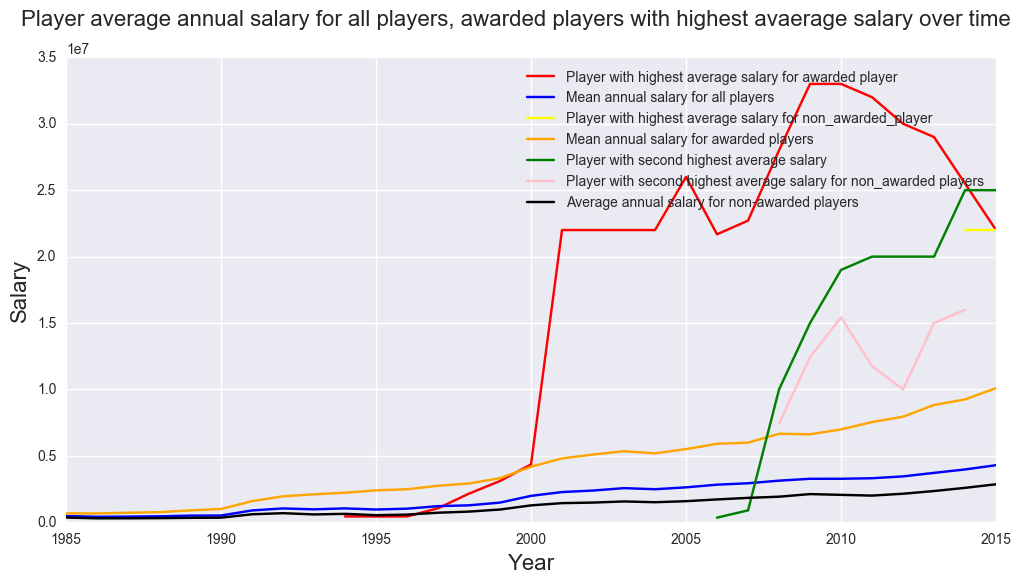

In [58]:
rodrial01= grouped_salary_player.get_group("rodrial01")
howarry01=grouped_salary_player.get_group("howarry01")
jeterde01=grouped_salary_player.get_group("jeterde01")
means=salaries.groupby("yearID").mean()

ziskri01=grouped_salary_player.get_group("ziskri01")
tanakma01=grouped_salary_player.get_group("tanakma01")
kurodhi01=grouped_salary_player.get_group("kurodhi01")
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)


p1,=plt.plot(rodrial01["yearID"],rodrial01["salary"],"red")
p2,=plt.plot(means.index,means,"blue")
p3,=plt.plot(tanakma01['yearID'],tanakma01['salary'],"yellow")
p4,=plt.plot(average_salary_awarded_player_by_year.index,average_salary_awarded_player_by_year,"orange")
p5,=plt.plot(howarry01["yearID"],howarry01['salary'],'green')
p6,=plt.plot(kurodhi01["yearID"],kurodhi01["salary"],"pink")
p7,=plt.plot(average_salary_non_awarded_player_by_year.index,average_salary_non_awarded_player_by_year,"black")
fig.suptitle("Player average annual salary for all players, awarded players with highest avaerage salary over time",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Salary",fontsize=16)
plt.legend([p1,p2,p3,p4,p5,p6,p7],["Player with highest average salary for awarded player","Mean annual salary for all players",\
                                   'Player with highest average salary for non_awarded_player',"Mean annual salary for awarded players",\
                                   "Player with second highest average salary",\
                                   "Player with second highest average salary for non_awarded players",\
                                   "Average annual salary for non-awarded players"])
plt.show()



From the above line plot, we can see that in average, salaries of awarded players are much higher than those of all players (including awarded players and non awarded players). The average salary of non-awarded players is slightly lower than that of all players. Also, from the line plots of specific players, we can see that the top two non-awarded plyers with highest salaries had relative short salary history and only started in quite recent years. Rather, the awarded players with 2 highest average salary have salary information of relative longer time. To be more specific, we can clearly see the huge salary bump throughout the year. For example, for the player with highest average salary for awarded player (the line in color red), there was a huge bump from 2000 to 2001. 

# Answer questions

After exploring the data for some time, now let's devide the question into several parts, and then use statistics to answer them.
Q1. Do players receive higher salary immediately after receiving their first award? Is there a significant raise in salary after winning an award?
Q2. How does average yearly salary increase rate for awarded players change after receiving their first award? Does the average yearly salary increase rate increase after receiving the award?
Q3. How is average yearly salary increase rate for awarded players, compared to that of non awarded players? Is it higher than the latter, or lower?

Let's dig into Q1 first.
First things first, let's try to get the salary info before players receiving awards and after players receiving awards.

Save the first year for awarded players to receive awards to a dictionary.

Divide the dictionary of awarded_players_with_salary_data into two parts, one before players receiving the first awards, the other one after.

In [59]:
before_awarded=awarded_player_salary.loc[(awarded_player_salary["yearID"]) < (awarded_player_salary["first_awarded_year"])]     

In [60]:
after_awarded=awarded_player_salary.loc[(awarded_player_salary["yearID"]) >= (awarded_player_salary["first_awarded_year"])]     

In [61]:
last_year_before_awarded=before_awarded[before_awarded["yearID"]==(before_awarded["first_awarded_year"]-1)]
first_year_after_awarded=after_awarded[after_awarded["yearID"]==(after_awarded["first_awarded_year"])]

In [62]:
players_in_before_after=set(first_year_after_awarded["playerID"]) &set(last_year_before_awarded["playerID"])

In [63]:
last_year_before_awarded=before_awarded[(before_awarded["playerID"].isin (players_in_before_after)) &(before_awarded["yearID"]==(before_awarded["first_awarded_year"]-1))]
last_salary_before_awarded=last_year_before_awarded[["playerID","salary"]]
first_year_after_awarded=after_awarded[(after_awarded["playerID"].isin (players_in_before_after)) &(after_awarded["yearID"]==(after_awarded["first_awarded_year"]))]
first_salary_after_awarded=first_year_after_awarded[["playerID","salary"]]

In [64]:
first_salary_after_awarded=first_salary_after_awarded.rename(columns={"playerID":"playerID","salary":"first_salary_after_awarded"})

In [65]:
last_salary_before_awarded=last_salary_before_awarded.rename(columns={"playerID":"playerID","salary":"last_salary_before_awarded"})

In [66]:
first_salary_after_awarded=first_salary_after_awarded.merge(last_salary_before_awarded,on="playerID")

In [67]:
first_salary_after_awarded["immediate salary change"]=first_salary_after_awarded['first_salary_after_awarded']/first_salary_after_awarded['last_salary_before_awarded']

Print the statistics information about immediate_salary_changes_after_winning values.

In [68]:

df=first_salary_after_awarded["immediate salary change"].to_frame()
df.describe()

,immediate salary change
count,383.000000
mean,2.291161
std,1.961310
min,0.062500
25%,1.150123
50%,1.500000
75%,2.518178
max,12.232416


Print the statistics information about immediate_salary_changes_after_winning values.

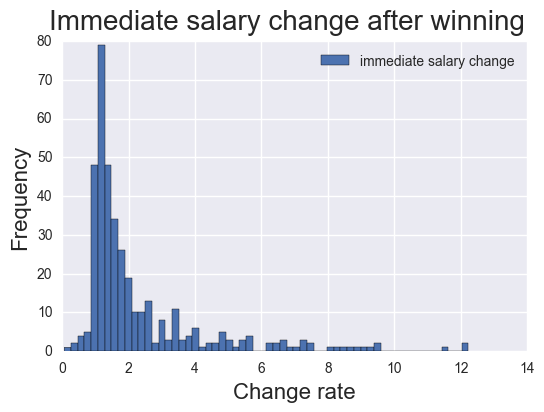

In [69]:
df.plot.hist(bins=60);
plt.suptitle("Immediate salary change after winning",fontsize=20)
plt.xlabel("Change rate",fontsize=16)
plt.ylabel("Frequency",fontsize=16)

From the above histogram, we can see that most awarded players had immediate salary change after winning falling in the bins between 0 and 2. Few players have the rate of over 5.

Now try to find the number of players whose salary got lower the next year after receiving an award for the first time.

In [70]:
print len(df[df["immediate salary change"]<1])

18


We can see that there were actually 18 players whose salary became lower the year when they won their first award.

Now try to find the proportion of players whose salary got lower the next year after receiving an award for the first time among the awarded players whose salary data is obtained before winning the first award and after winning the first award.

In [71]:
print len(df[df["immediate salary change"]<1])/float(len(df))

0.0469973890339


From above we can see that less than 5% of awarded players got lower salary the next year after receiving their first award. Now we'd like to check how average salary has changed before winning an award and after receiving one.

In [72]:
g=after_awarded.groupby('playerID')

## Print the summary statistics for the annual salary increase rate after winning the first medal.

In [73]:
df_general_awarded_players=(g.aggregate(np.max)['salary']/g.aggregate(np.min)['salary'])/(g.aggregate(np.max)['yearID']-g.aggregate(np.min)['yearID'])

df_general_awarded_players=df_general_awarded_players.to_frame()

df_general_awarded_players.columns=["value"]

df_general_awarded_players.loc[df_general_awarded_players.value==inf,"value"]=1

df_general_awarded_players.describe()

,value
count,657.000000
mean,2.071106
std,2.887787
min,0.171875
25%,0.609375
50%,1.058824
75%,2.678571
max,46.666667


## Print the summary statistics for the annual salary increase rate before winning the first medal.

In [74]:
g1=before_awarded.groupby('playerID')
df_general_awarded_players_before=(g1.aggregate(np.max)['salary']/g1.aggregate(np.min)['salary'])/(g1.aggregate(np.max)['yearID']-g1.aggregate(np.min)['yearID'])

df_general_awarded_players_before=df_general_awarded_players_before.to_frame()

df_general_awarded_players_before.columns=["value"]

df_general_awarded_players_before.loc[df_general_awarded_players_before.value==inf,"value"]=1

df_general_awarded_players_before.describe()

,value
count,400.000000
mean,2.425924
std,2.250677
min,0.338568
25%,1.000000
50%,1.340303
75%,3.282366
max,11.904762


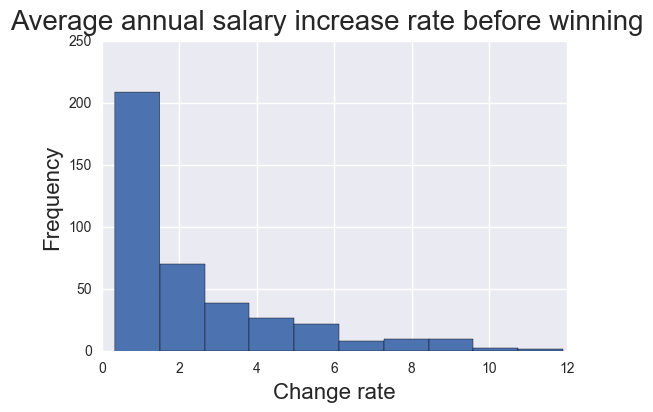

In [75]:
df_general_awarded_players_before['value'].plot.hist()
plt.suptitle("Average annual salary increase rate before winning",fontsize=20)
plt.xlabel("Change rate",fontsize=16)
plt.ylabel("Frequency",fontsize=16)

From the above histogram, we can see that before winning, over 200 players has average annual salary increase rate of between 0 and 2. About 70 players have that of around 2. Relative few players have that of over 4. The highest average annual salary increase rate is almost 12.

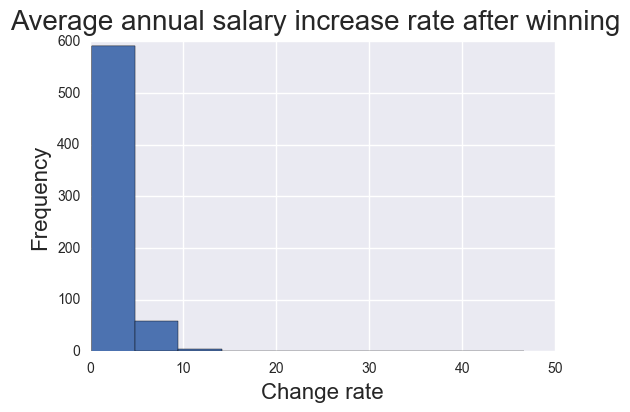

In [76]:
df_general_awarded_players['value'].plot.hist()
plt.suptitle("Average annual salary increase rate after winning",fontsize=20)
plt.xlabel("Change rate",fontsize=16)
plt.ylabel("Frequency",fontsize=16)

From the above histogram, we can see that after winning, almost 600 players has average annual salary increase rate of between 0 and 4. About 70 players have that of between 5 and 9. Few players have that of over 9. The highest average annual salary increase rate is over 45.

Comparing the last two histograms, we can see that the annual salary incease rate after winning the first medal is more skewed than that before winning the first medal. In other words, more players 

## Get average yearly increase of salary for non-awarded-players.

In [77]:
g2=non_awarded_player_salary.groupby('playerID')

In [78]:

df_non_awarded_players=(g2.aggregate(np.max)['salary']/g2.aggregate(np.min)['salary'])/(g2.aggregate(np.max)['yearID']-g2.aggregate(np.min)['yearID'])

df_non_awarded_players=df_non_awarded_players.to_frame()

df_non_awarded_players.columns=["value"]

df_non_awarded_players.loc[df_non_awarded_players.value==inf,"value"]=1

df_non_awarded_players.describe()

,value
count,4300.000000
mean,1.443185
std,1.310777
min,0.103846
25%,0.787550
50%,1.000000
75%,1.500639
max,11.977573


## Get the annual salary increase rate for awarded players

In [79]:
g3=awarded_player_salary.groupby("playerID")

In [80]:
df_awarded_players=(g3.aggregate(np.max)['salary']/g3.aggregate(np.min)['salary'])/(g3.aggregate(np.max)['yearID']-g3.aggregate(np.min)['yearID'])

df_awarded_players=df_awarded_players.to_frame()

df_awarded_players.columns=["value"]

df_awarded_players.loc[df_awarded_players.value==inf,"value"]=1

df_awarded_players.describe()

,value
count,658.000000
mean,3.827219
std,3.481972
min,0.185185
25%,1.060283
50%,3.201145
75%,5.651595
max,46.666667


## Print the statistics information for average yearly salary increase for both awarded players and non awarded players.

So here is answer to the questions Q1 to Q3.


Q1. Do players receive higher salary immediately after receiving their first award? Is there a significant raise in salary after winning an award?

Winning an award doesn't always bring a significant raise in salary for players. At least not immediately. Actually less than 5% of players got lower salary the next year after winning an award.

Q2. How does average yearly salary increase rate for awarded players change after receiving their first award? Does the average yearly salary increase rate increase after receiving the award?

When comparing yearly average salary increase rate for awarded players' salary before receiving the first awards with that after receiving the first award before receiving the first award,  we can notice that the median value of players' salary increase is 1.340303 every year, (the 25% being 1.000000, and 75% being 3.282366), while after receiving the first award, the median value of players' salary increase is 1.058824 every year (the 25% being 0.609375 and 75% being 2.678571).

Statistical hypothesis testing for Q2.

H0: μbefore=μafter

HA: μbefore< μafter

Significance level: 0.05

One-tailed test 

Degree of Freedom: 400+657-2>1000 

T critical: 1.65

μbefore=2.425924

μafter=2.071106

SDbefore=2.250677

SDafter=2.887787

SE=sqrt((SDbefore^2/nbefore)+(SDafter^2/nafter))=0.15923845896



T=(2.071106-2.425924)/SE=-2.228

T < T critical, therefore we failed to reject the null hypothesis. There is no significant difference between before winning the first medal and after winning the first medal.




Q3. How is average yearly salary increase rate for awarded players, compared to that of non awarded players? Is it higher than the latter, or lower?

When comparing the average yearly salary increase of non awarded players with the awarded players, we can see that in general, awarded players get much higher yearly salary increase than non awarded players. The mean of yearly salary increase of awarded players is 3.827219 while that for non awarded players is only 1.443185. The median value of awarded players is 3.201145 while that for non awarded player is only 1. The 25% value of awarded players is 1.060283, whilt that for non awarded players is 0.787550. The 75% value of awarded players is 5.651595 while that for non awarded players is only 1.500639. Therefore, we can conclude that after receiving the first award, player's relative salary increase isn't necessarily higher than before receiving the first award. However, in the long term, the average yearly salary increase is much higher for awarded players than that for non awarded players.

Statistical hypothesis testing for Q3.


H0: μN=μA, HA: μN< μA,

Significance level: 0.05

One-tailed test 

Degree of Freedom: 4300+658-2>4000

T critical: 1.65

μA=3.827219,
 

μN=1.443185, 

SDA=3.481972, 

SDN=1.310777,

SE=sqrt((SDA^2/nA)+(SDN^2/nN))=0.1372053008

T=(3.481972-1.443185)/SE=14.859,


T is much larger than T critical, therefore H0 is rejected.



Conclusion: Annual salary increase rate for awarded players is larger than that for non-awarded players.

# Data Wrangling

In [81]:
master.isnull().head()

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
aaronha01,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
aaronto01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
aasedo01,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
abadan01,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [82]:
salaries.isnull().head()

,yearID,teamID,lgID,playerID,salary
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [83]:
awards_players.isnull().head()

,awardID,yearID,lgID,tie,notes
playerID,,,,,
bondto01,False,False,False,True,True
hinespa01,False,False,False,True,True
heckegu01,False,False,False,True,True
radboch01,False,False,False,True,True
oneilti01,False,False,False,True,True


As shown above, some information was missing (or not applicable, such as death information was missing because the player is still alive) from the three dataframes that we worked with. However, they are not what we are interested in in the analysis. So we totally ignore their missing by keeping them in our analysis. I made the decision because I am only interested in the salary, awards, and awarded year in this project.

I made this decision because if I dropped the rows which contain missing info, I would be dropping a lot of players. This can make the analysis more limited (the salary data dated back to 1985 while the awards information dated back to 1877. There is a gap of over 100 years in between).

However, during the analysis, I did notice that the salaries dataset only contains salary information dating back to 1985 while the awards players dataset contains awards informatin dating back to 1877. So salary information of only a small portion of awarded players can be traced back, and it is the same with non awarded players. So I could only work with the data provided.

Also, as stated below, salary information of some awarded players before winning the first award was missing, while that of some awarded players after winning the first award was missing (because some won the first award in 2015, last year). I omitted these players when calculating how did yearly salary increase rate change after winning the first award, and kept them when doing other calculations.

# Limitation of analysis

In [84]:
awarded_players=pd.read_csv( 'AwardsPlayers.csv')
print len(awarded_players_with_salary)/float(len(awarded_players))

0.108259295821


First, the earliest awarded player dated back 1877, while the earliest salary information only dated back to 1985. According to the calculation above, salary data of less than 11% of awarded players was calculated. Missing data leads to protential problems for our analysis. The missing salary information before 1985 can hide the fact that highest salary given before 1985 was probably much lower than the maximum salary found in the analysis (33 million). We could clearly see that the highest salary paid has been increasing from 1985 (as shown in Out[7]). Therefore, the general average yearly salary increase rate for awarded players might have been lower than found in Out[83].

Second, our analysis does not imply a causation relation between winning an award with higher pay. It only suggests a correlation between winning an award and getting higher pay. My personal explanation for this correlation is because I failed to analyze the variable that I was originally interested, the performance of players, due to my limited knowledge in baseball. So instead I performed analysis on winning awards, which can be a direct result of getting good performance, instead of its cause. We can intuitively sensed a causation/correlation relation between good performance and higher pay, just like in every other industry, people who can get their jobs well tend to get higher pay. 

Third, I didn't perform statistical hypothesis testing for Q1, as I figured this question isn't interested in doing a comparison between any two data sets. So listing statistics information should be solid enough in answering this question. 